# **Homework: Week #21 | Quantum Error Correction**
---

### **Description**:
In this week's homework, you will implement a phase flip error correcting code.


---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [1]:
#!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

import warnings
warnings.filterwarnings('ignore')

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## **Part 1: Phase Flip Code**
---

In this section, you will implement and explore a 3-qubit phase flip error correcting code. This is very similar to the bit flip code we explored in lab, but dealing with sign flips instead of bit flips.

<br>

For example, noise could cause $\frac{1}{\sqrt 2}(|0\rangle + |1\rangle)$ to switch to $\frac{1}{\sqrt 2}(|0\rangle - |1\rangle)$. In other words, a phase flip error can cause the $|+\rangle$ state to turn into $|-\rangle$ and vice-versa.

### **Step #1: Encoding** 

Create a 3-qubit phase flip encoded quantum circuit. Specifically,
1. Initialize a circuit with 3 qubits and 1 classical bit.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

**NOTE**: The first two steps are identical to what we do for the bit flip code.

#### **1. Initialize a circuit with 3 qubits and 1 classical bit.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [7]:
phaseflip_circuit = QuantumCircuit(3,1)# COMPLETE THIS LINE

#### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [8]:
phaseflip_circuit.cx(0,1)# COMPLETE THIS LINE
phaseflip_circuit.cx(0,2)# COMPLETE THIS LINE

#### **3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

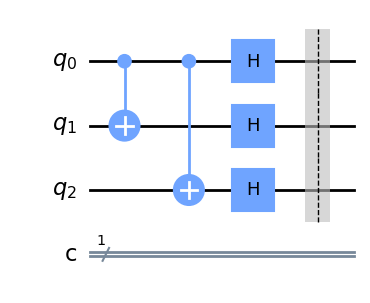

In [9]:
phaseflip_circuit.h(0)# COMPLETE THIS LINE
phaseflip_circuit.h(1)# COMPLETE THIS LINE
phaseflip_circuit.h(2)# COMPLETE THIS LINE

phaseflip_circuit.barrier()
phaseflip_circuit.draw()

### **Step #2: Sending Over Noisy Channel** 

Simulate a phase flip error on $q_0$. **Hint**: What gate flips a qubit from $|+\rangle$ to $|-\rangle$?

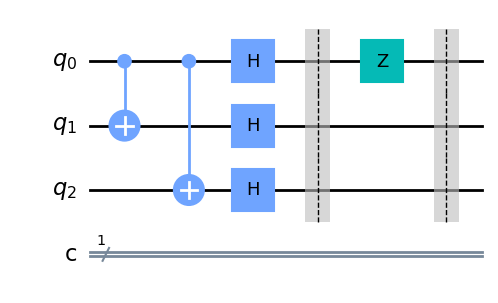

In [10]:
phaseflip_circuit.z(0)# COMPLETE THIS LINE

phaseflip_circuit.barrier()
phaseflip_circuit.draw()

### **Step #3: Error Detection**

Next, we will detect if there's been an error by checking the *phase* (do the phases agree with each other or are they diffent?) of $q_0$ with the other qubits by *bringing all the qubits out of superposition* (H gates) and then checking the parity of the $q_0$ with the ancilla qubits by applying two CNOTs controlled by $q_0$ and targeting the ancilla qubits.

**NOTE**: Only the part dealing with superposition is different from the bit flip code.

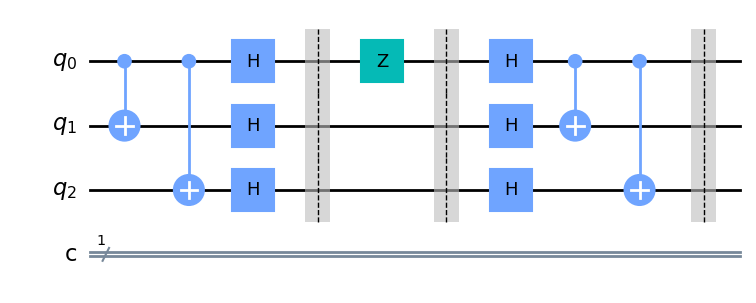

In [11]:
phaseflip_circuit.h(0)# COMPLETE THIS LINE
phaseflip_circuit.h(1)# COMPLETE THIS LINE
phaseflip_circuit.h(2)# COMPLETE THIS LINE

phaseflip_circuit.cx(0,1)# COMPLETE THIS LINE
phaseflip_circuit.cx(0,2)# COMPLETE THIS LINE

phaseflip_circuit.barrier()
phaseflip_circuit.draw()

### **Step #4: Error Correction** 

Apply the Toffoli gate controlled by the ancillary qubits and targeting $q_0$.

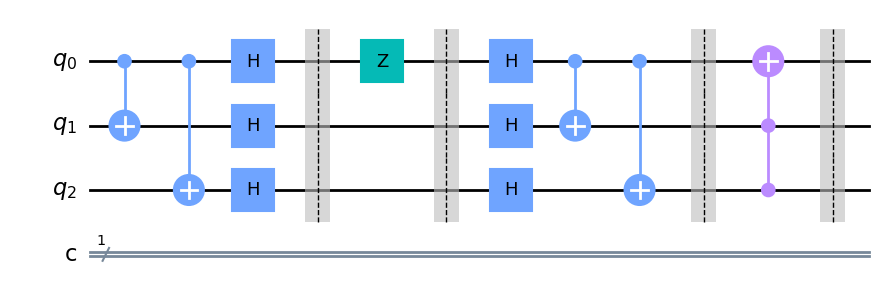

In [12]:
phaseflip_circuit.ccx(1,2,0)# COMPLETE THIS LINE

phaseflip_circuit.barrier()
phaseflip_circuit.draw()

### **Step #5: Decoding**

The logical state has been stored in $q_0$, so we will measure this to decode the final logical state.

**Run the code below to simulate measuring the first qubit at the end of this circuit.**

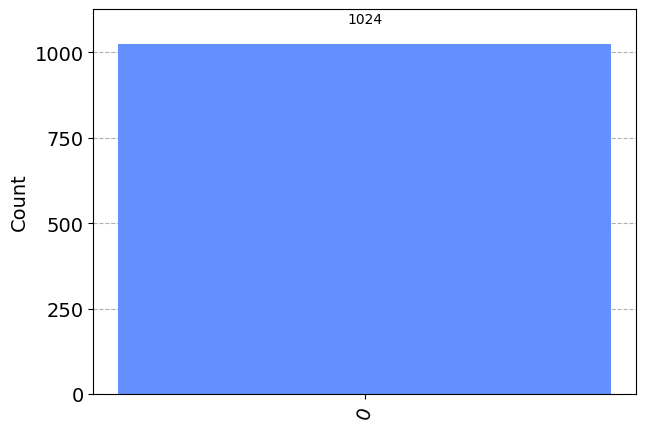

In [13]:
phaseflip_circuit.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')
job = execute(phaseflip_circuit, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### **Exercise #1** 

The code below combines your work from above. Modify this code so that the logical qubit is in the $|+\rangle$ state instead of the $|0\rangle$ state.

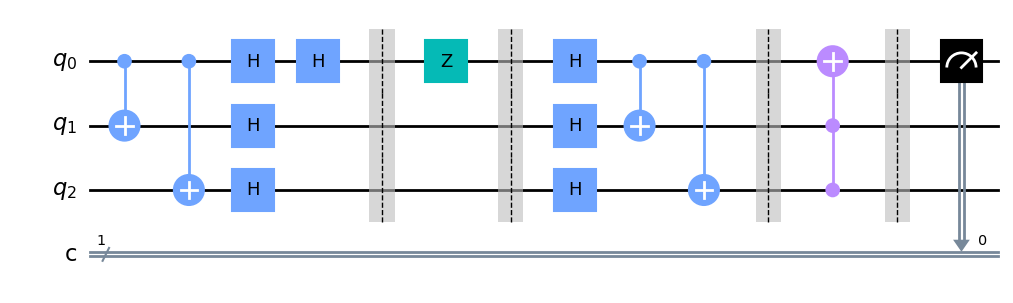

In [22]:
# ENCODING
phaseflip_circuit = QuantumCircuit(3, 1)
phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
# COMPLETE THIS CODE TO CREATE THE LOGICAL STATE |+>
phaseflip_circuit.h(0)
phaseflip_circuit.barrier()


# NOISY CHANNEL
phaseflip_circuit.z(0)
phaseflip_circuit.barrier()


# ERROR DETECTION
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.barrier()


# ERROR CORRECTION
phaseflip_circuit.ccx(2, 1, 0)
phaseflip_circuit.barrier()


# DECODING
phaseflip_circuit.measure(0, 0)
phaseflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

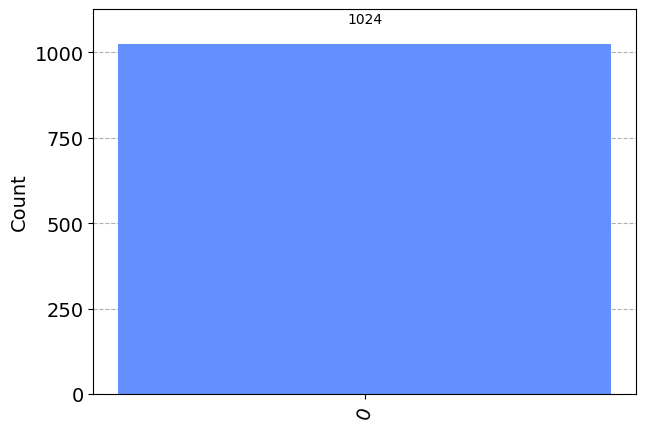

In [23]:
backend = Aer.get_backend('qasm_simulator')
job = execute(phaseflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Exercise #2**

Modify the code below with the logical qubit in the $|+\rangle$ state and with a phase flip error on $q_1$ instead of $q_0$.

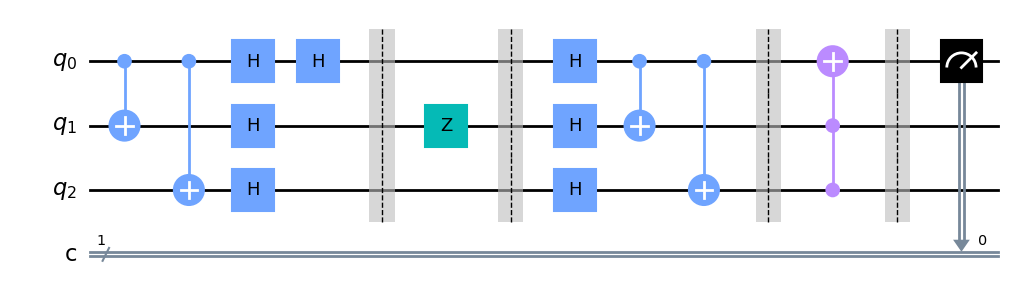

In [24]:
# ENCODING
phaseflip_circuit = QuantumCircuit(3, 1)

phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
# COMPLETE THIS CODE TO CREATE THE LOGICAL STATE |+>
phaseflip_circuit.h(0)
phaseflip_circuit.barrier()


# NOISY CHANNEL
phaseflip_circuit.z(1) # CHANGE SO THERE'S A PHASE FLIP ERROR ON Q1 INSTEAD OF Q0
phaseflip_circuit.barrier()


# ERROR DETECTION
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.barrier()


# ERROR CORRECTION
phaseflip_circuit.ccx(2, 1, 0)
phaseflip_circuit.barrier()


# DECODING
phaseflip_circuit.measure(0, 0)
phaseflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

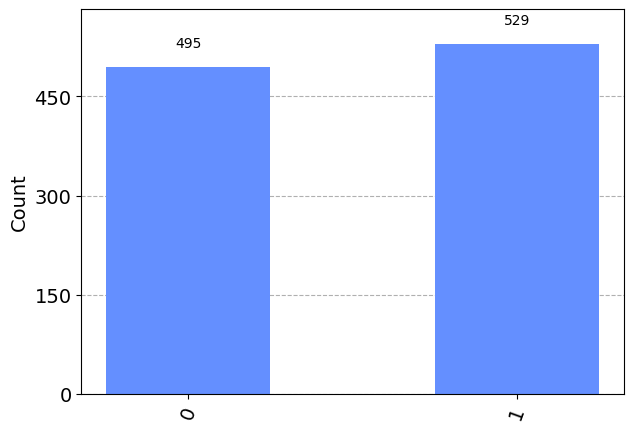

In [25]:
backend = Aer.get_backend('qasm_simulator')
job = execute(phaseflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Exercise #3**

Modify the code below, with the logical qubit in the $|+\rangle$ state, so that there's a phase flip error on both $q_0$ and $q_1$.

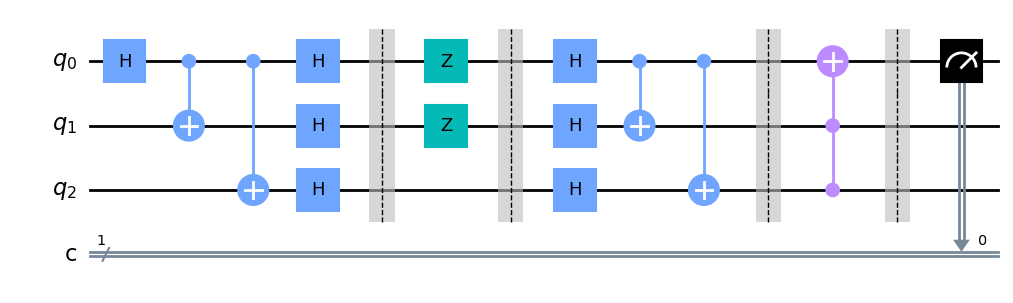

In [20]:
# ENCODING
phaseflip_circuit = QuantumCircuit(3, 1)
phaseflip_circuit.h(0)
phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
# COMPLETE THIS CODE TO CREATE THE LOGICAL STATE |+>
phaseflip_circuit.barrier()


# NOISY CHANNEL
phaseflip_circuit.z(0) # CHANGE SO THERE'S A PHASE FLIP ERROR ON BOTH Q0 AND Q1
phaseflip_circuit.z(1)
phaseflip_circuit.barrier()


# ERROR DETECTION
phaseflip_circuit.h(0)
phaseflip_circuit.h(1)
phaseflip_circuit.h(2)
phaseflip_circuit.cx(0, 1) 
phaseflip_circuit.cx(0, 2)
phaseflip_circuit.barrier()


# ERROR CORRECTION
phaseflip_circuit.ccx(2, 1, 0)
phaseflip_circuit.barrier()


# DECODING
phaseflip_circuit.measure(0, 0)
phaseflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

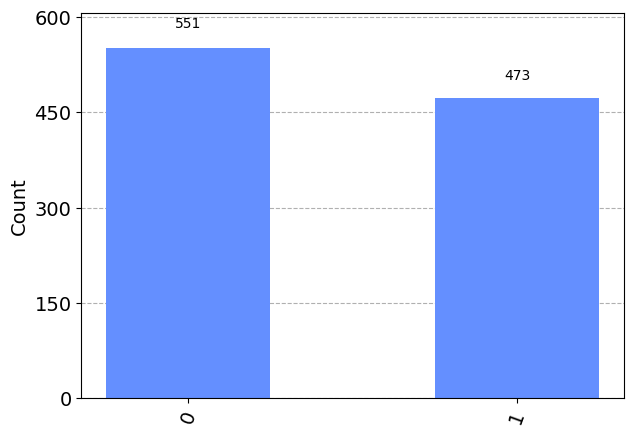

In [21]:
backend = Aer.get_backend('qasm_simulator')
job = execute(phaseflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Followup Activities**

To further hone your understanding of the bit flip code, consider trying the following activities:
* Remove parts of the circuit such as the phase checks or error correcting Toffoli to see what happens.
* Alter this code to correct for an error on a different qubit.
* Expand this 3 qubit error correcting code to a 4+ qubit error correcting code. Can these sustain more errors than the one above? Are there patterns to how many errors an *n* qubit code can handle?
* Is there a way to combine the phase and bit flip code so that both types of errors are corrected?
* Is there a way in Qiskit to see the resulting logical state without having to measure so that we can see the phase more clearly? 

# End of Notebook

---

© 2023 The Coding School, All rights reserved